In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:


import pandas as pd
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.naive_bayes import GaussianNB;
import pickle;



# Let us import the data first

In [2]:
data = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

How does it look? Let's figure out

In [3]:
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Looks Perfect. No missing value what so ever. We can start to visualize it

In [4]:
data['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

# Visualization

# Branch with Pieplot?

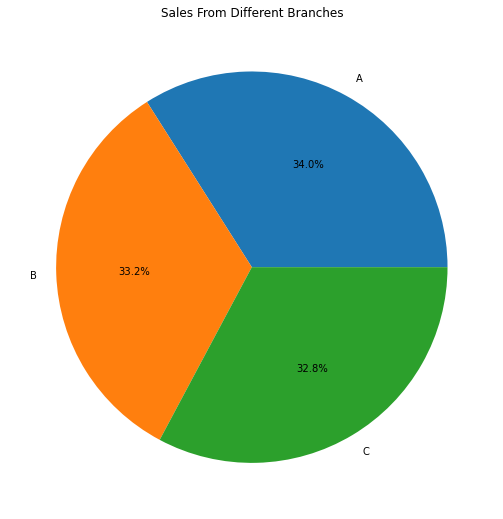

In [5]:
plt.figure(figsize = (16,9))
Branch = data.Branch.value_counts().reset_index()
plt.pie(Branch.Branch, labels = Branch['index'],autopct='%1.1f%%')
plt.title("Sales From Different Branches")
plt.show()

A branch is generating most number of sales. The least is generated by C branch.

# City Next

In [6]:
data['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

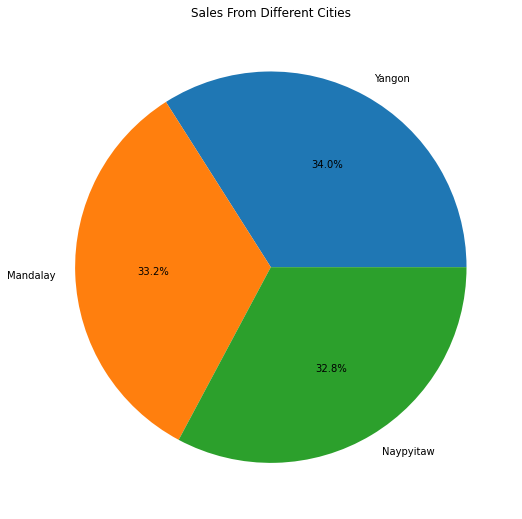

In [7]:
plt.figure(figsize = (16,9))
City = data.City.value_counts().reset_index()
plt.pie(City.City, labels = City['index'],autopct='%1.1f%%')
plt.title("Sales From Different Cities")
plt.show()

So, A branch is situated in Yangon. That's why we are getting most numbe rof sales from that city. And, very obvious we are getting least from Naypyitaw, where C branch is situated

# Hmm! How can we forget the customers?

In [8]:
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

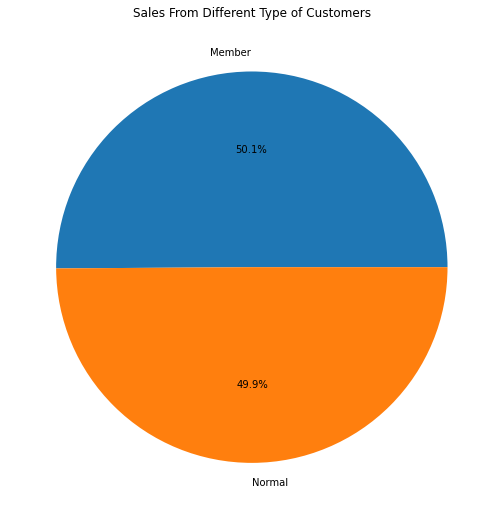

In [9]:
plt.figure(figsize = (16,9))
Customer = data['Customer type'].value_counts().reset_index()
plt.pie(Customer['Customer type'], labels = Customer['index'],autopct='%1.1f%%')
plt.title("Sales From Different Type of Customers")
plt.show()

That's kinda tie. Getting almost equal from members and normal customers


# Genders?

In [10]:
data['Gender'].unique()	

array(['Female', 'Male'], dtype=object)

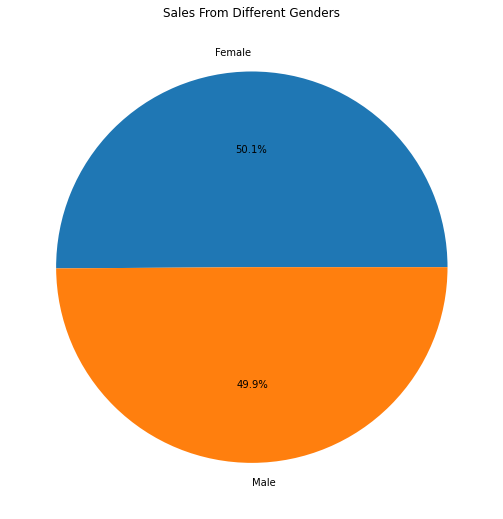

In [11]:
plt.figure(figsize = (16,9))
Gender = data.Gender.value_counts().reset_index()
plt.pie(Gender.Gender, labels = Gender['index'],autopct='%1.1f%%')
plt.title("Sales From Different Genders")
plt.show()

Whoo! Thats unexpected. I thought women would have clear authority here. But this seems to be tie as well. 

See! data is so much important. Your intution can go wrong, but not data

# So, what kind of products people buy the most?

In [12]:
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

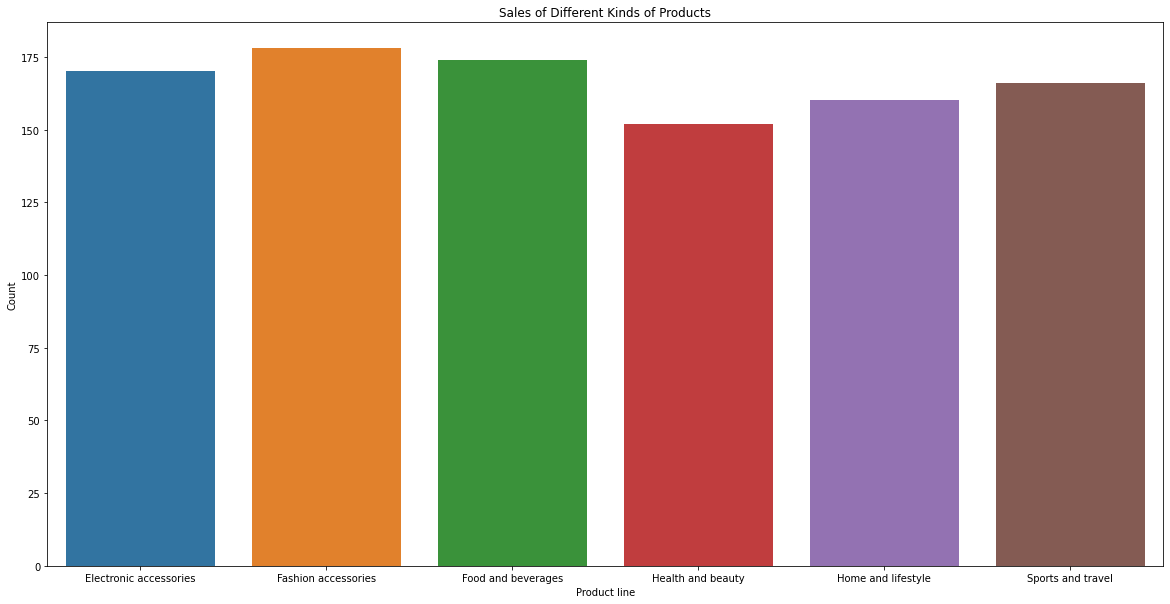

In [13]:
plt.figure(figsize = (20,10))

Product = data.groupby('Product line').size().to_frame(name = "count").reset_index()
sns.barplot(y = 'count', x='Product line', data = Product )

plt.title("Sales of Different Kinds of Products")
plt.xlabel("Product line")
plt.ylabel("Count")

plt.show()

Fashion products are bought the most. Next comes food and beverages. But the rest are not far behind. People are buying allmost all kind of products


In [15]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


# Let's see the unit prices fractuation as well as ranges

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:227: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


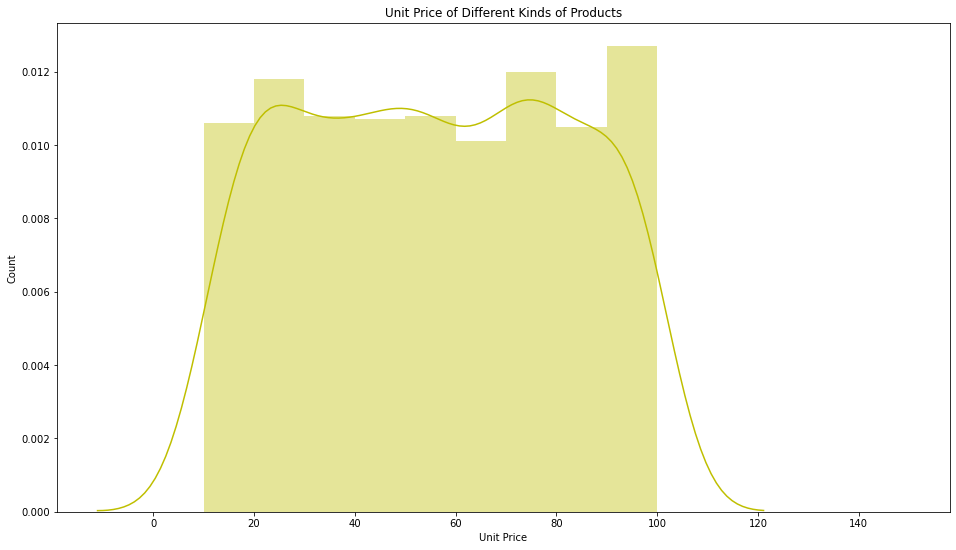

In [16]:
plt.figure(figsize = (16,9))
b  = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150];
sns.distplot(a= data['Unit price'], bins = b, color ='Y')
plt.title("Unit Price of Different Kinds of Products")
plt.xlabel("Unit Price")
plt.ylabel("Count")

plt.show()

Not too high, not too low. I think the range is moderate


# Tax ranges look like:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:227: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


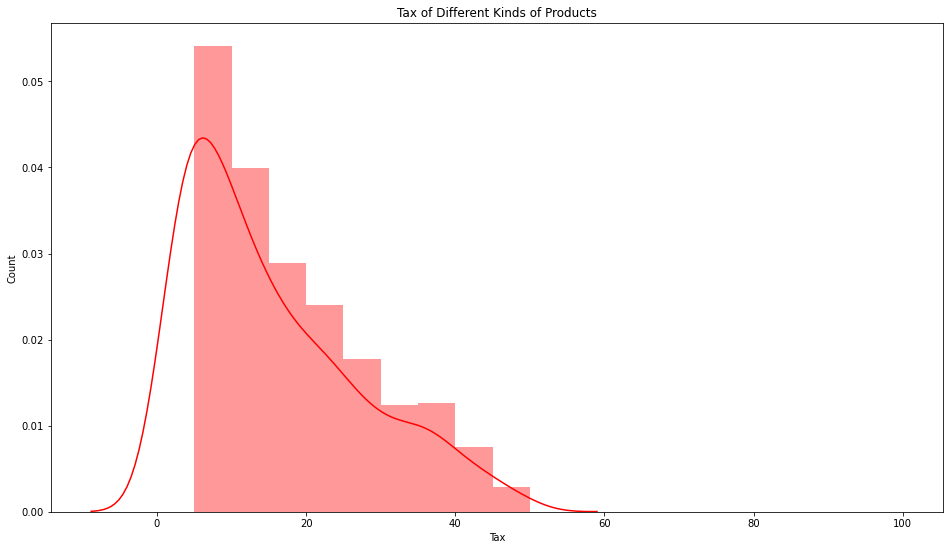

In [17]:
plt.figure(figsize = (16,9))
bb = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
sns.distplot(a= data['Tax 5%'], bins =bb, color = 'R')
plt.title("Tax of Different Kinds of Products")
plt.xlabel("Tax")
plt.ylabel("Count")

plt.show()

# How much total sales look like?

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:346: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.fill_between(x, 0, y, **shade_kws)


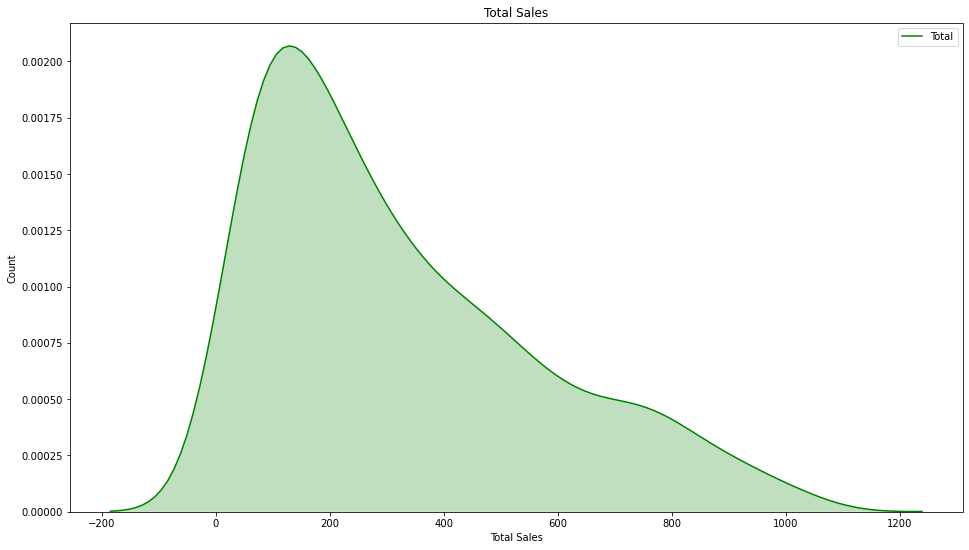

In [18]:
plt.figure(figsize = (16,9))
sns.kdeplot(data= data['Total'], shade = True, color = 'G')
plt.title("Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Count")

plt.show()

Yeah! Its the same as unit price. Very few people are doing a lot of marketing. Majority is keeping their expenses in moderate range.

# Payment methods:

In [19]:
data['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

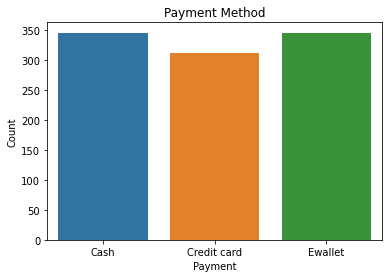

In [20]:


Payment = data.groupby('Payment').size().to_frame(name = "count").reset_index()
sns.barplot(y = 'count', x='Payment', data = Payment )

plt.title("Payment Method")
plt.xlabel("Payment")
plt.ylabel("Count")

plt.show()

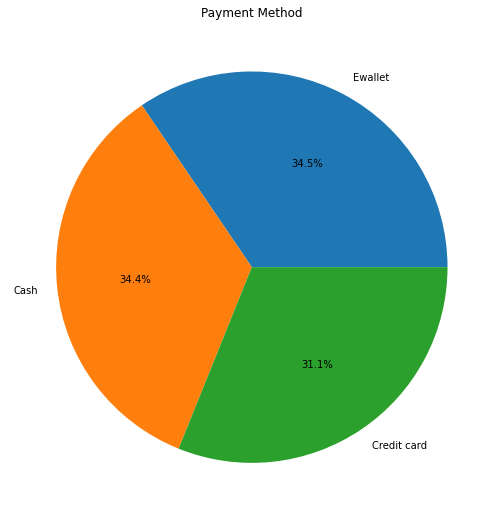

In [21]:
plt.figure(figsize = (16,9))
Payment = data.Payment.value_counts().reset_index()
plt.pie(Payment.Payment, labels = Payment['index'],autopct='%1.1f%%')
plt.title("Payment Method")
plt.show()

That's kind of equal as well. Interestingly people are more likely to not carry cash. Either paying via cards or ewallets

# Cogs

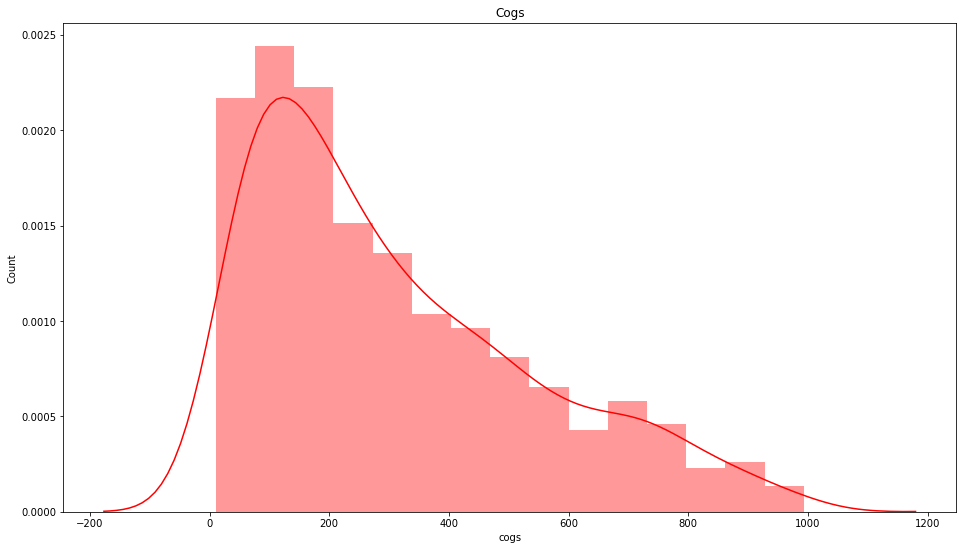

In [22]:
plt.figure(figsize = (16,9))
sns.distplot(a= data['cogs'],  color = 'R')
plt.title("Cogs")
plt.xlabel("cogs")
plt.ylabel("Count")

plt.show()

# Quantity:

In [23]:
data['Quantity'].unique()

array([ 7,  5,  8,  6, 10,  2,  3,  4,  1,  9])

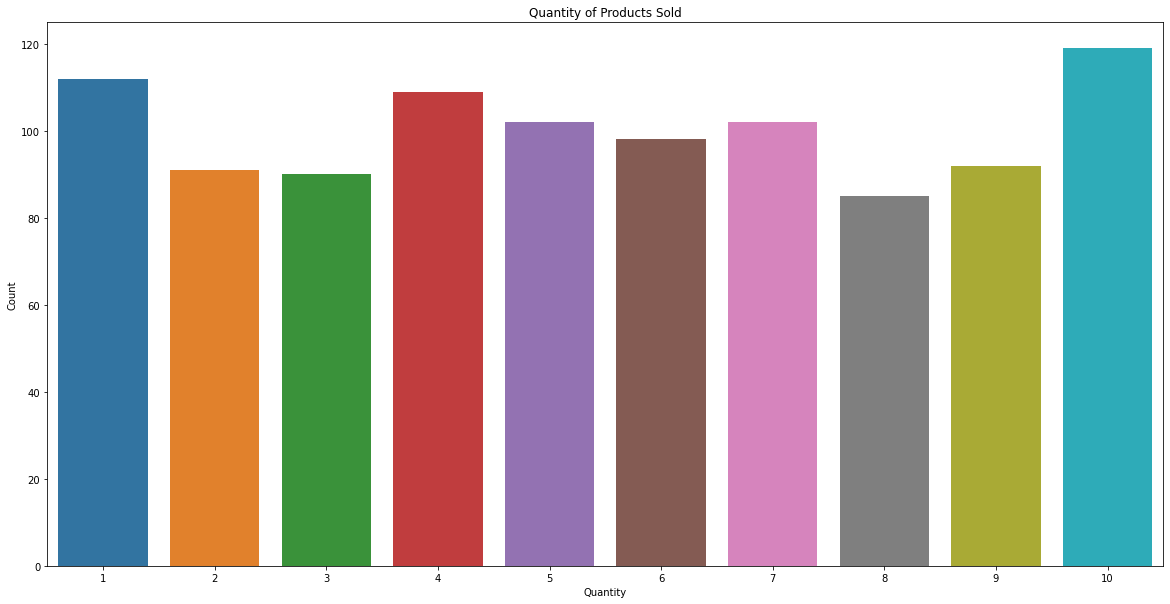

In [24]:
plt.figure(figsize = (20,10))

Quantity = data.groupby('Quantity').size().to_frame(name = "count").reset_index()
sns.barplot(y = 'count', x='Quantity', data = Quantity )

plt.title("Quantity of Products Sold")
plt.xlabel("Quantity")
plt.ylabel("Count")

plt.show()

# RATINGS SPEAK FOR THE CUSTOMERS. SO, HOW DO THEY RESPOND?

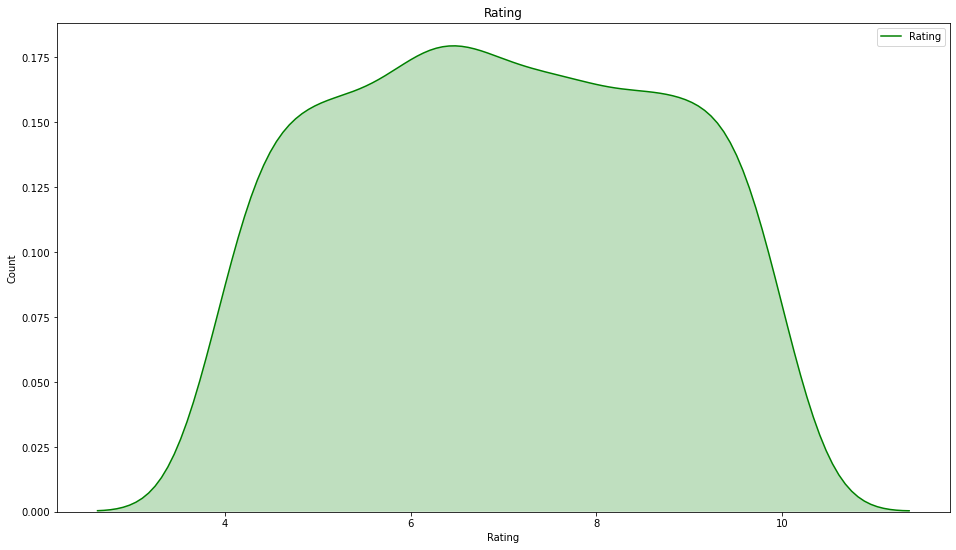

In [25]:
plt.figure(figsize = (16,9))
sns.kdeplot(data= data['Rating'], shade = True, color = 'G')
plt.title("Rating")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.show()

I think we have all kind of ratings. Starting from 4 to 10

# Gross Income

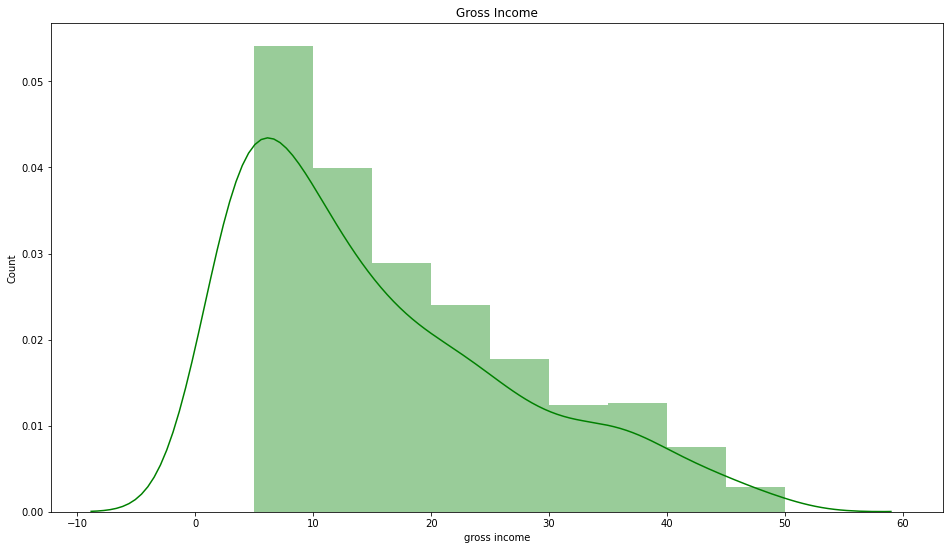

In [26]:
plt.figure(figsize = (16,9))
bbB = [5,10,15,20,25,30,35,40,45,50,55,60]
sns.distplot(a= data['gross income'], bins =bbB, color = 'G')
plt.title("Gross Income")
plt.xlabel("gross income")
plt.ylabel("Count")

plt.show()

In [28]:
data['gross margin percentage'] = data['gross margin percentage'].astype('float64')

In [ ]:
data

# Want Some Mashup?

# Which Branches sell what kind of products on how amnount?

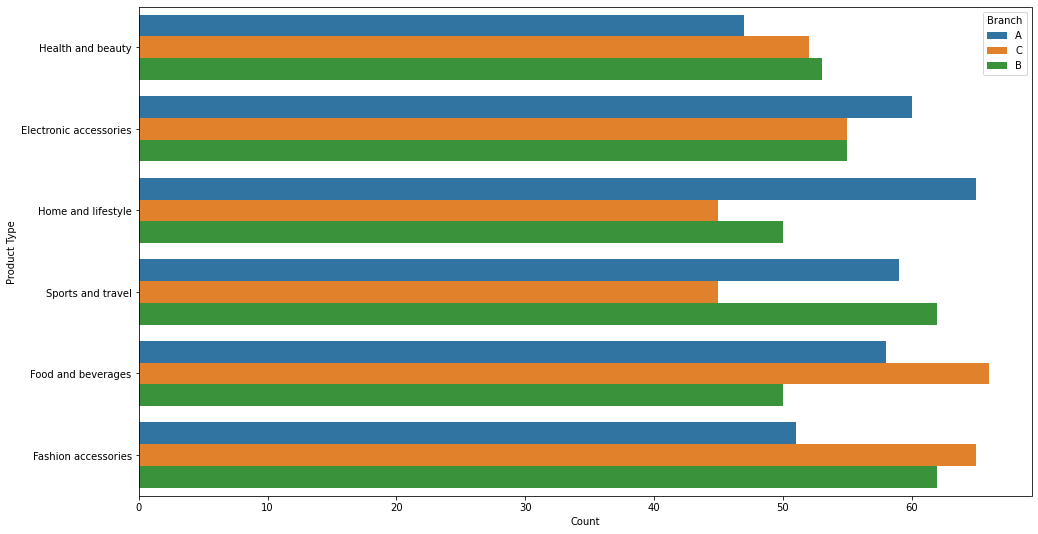

In [29]:
plt.figure(figsize = (16,9))
sns.countplot(y ='Product line', hue = "Branch", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

#     Which Products are bought more by males and females?

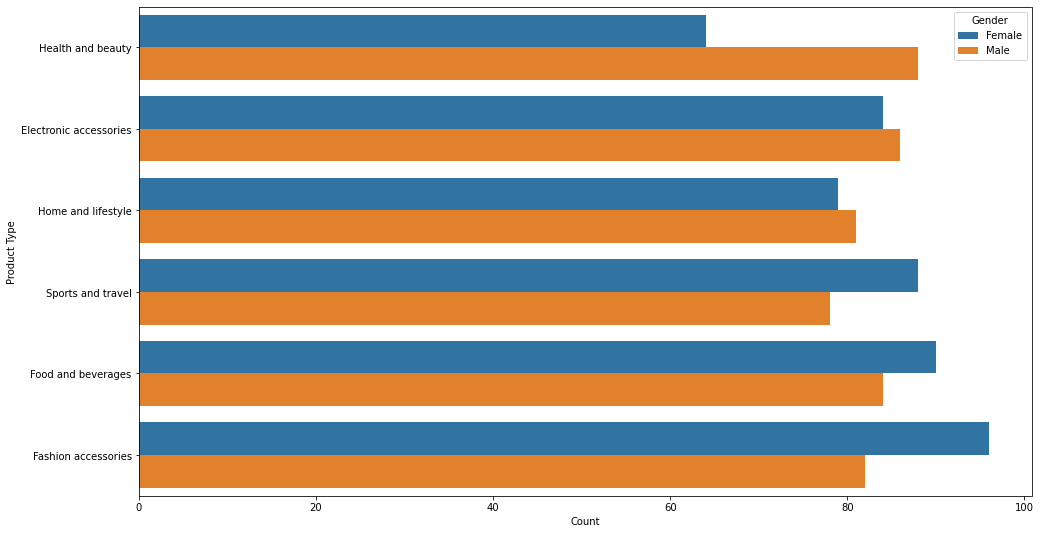

In [30]:
plt.figure(figsize = (16,9))
sns.countplot(y ='Product line', hue = "Gender", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Women are buying more fashin products, food and sports products. While men are more into health and electric products

# Which branch has what pecentage of male and female?

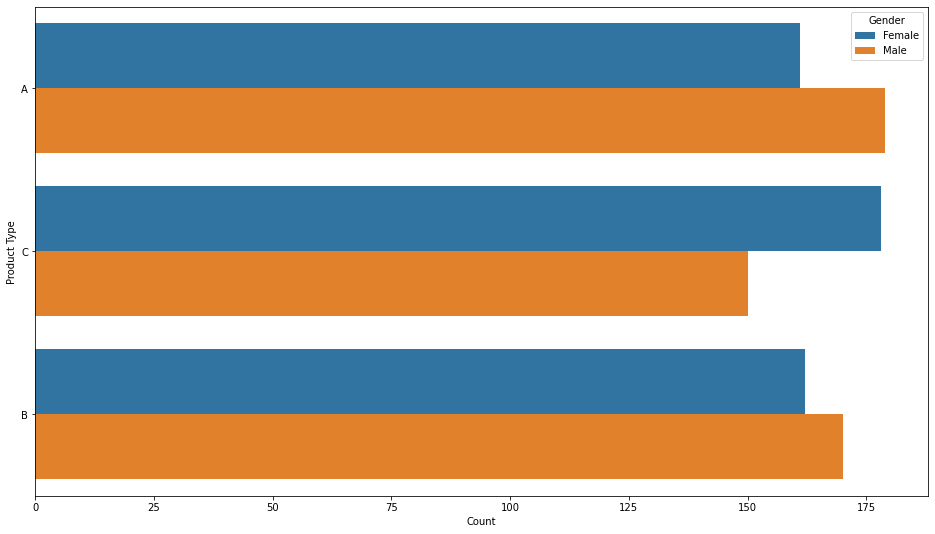

In [31]:
plt.figure(figsize = (16,9))
sns.countplot(y ='Branch', hue = "Gender", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

C branch has more female, opposite from the rest two. Is it the reason of C being last in sales? :D

# Normal customers vs Member?

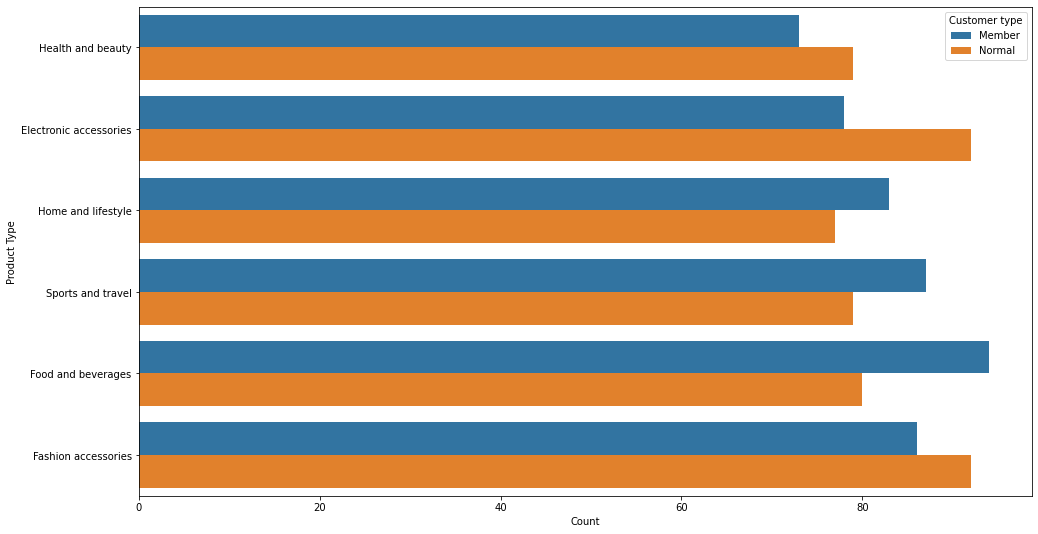

In [32]:
plt.figure(figsize = (16,9))
sns.countplot(y ='Product line', hue = "Customer type", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Interesting!!

# PAYMENT METHODS VS PRODUCTS?

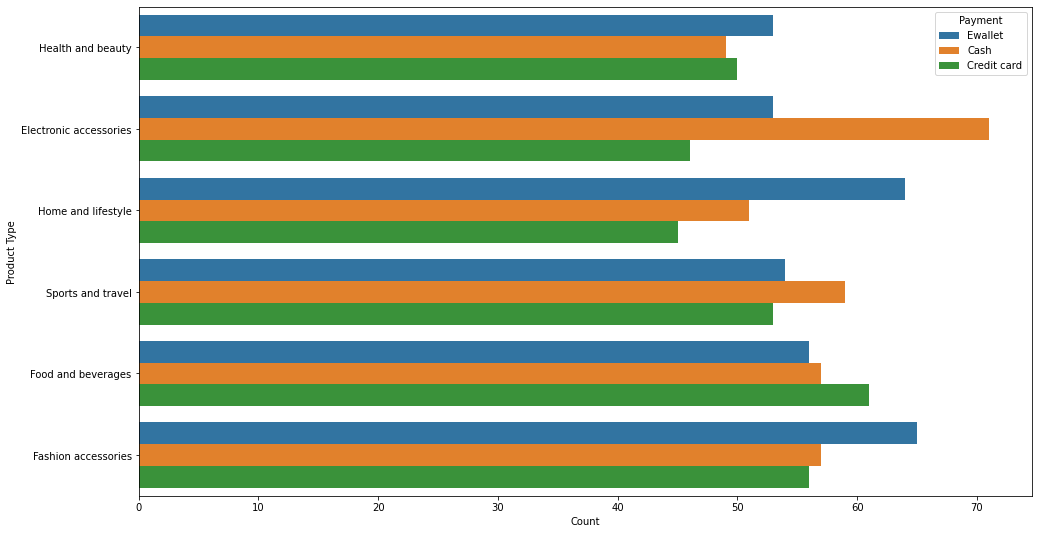

In [33]:
plt.figure(figsize = (16,9))
sns.countplot(y ='Product line', hue = "Payment", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

People are paying in cash for electric products!! Thats unexpected. I thought people pay less on cash for buying those.

WELL! I can be wrong, but the data isn't

# Gender vs payment methods?

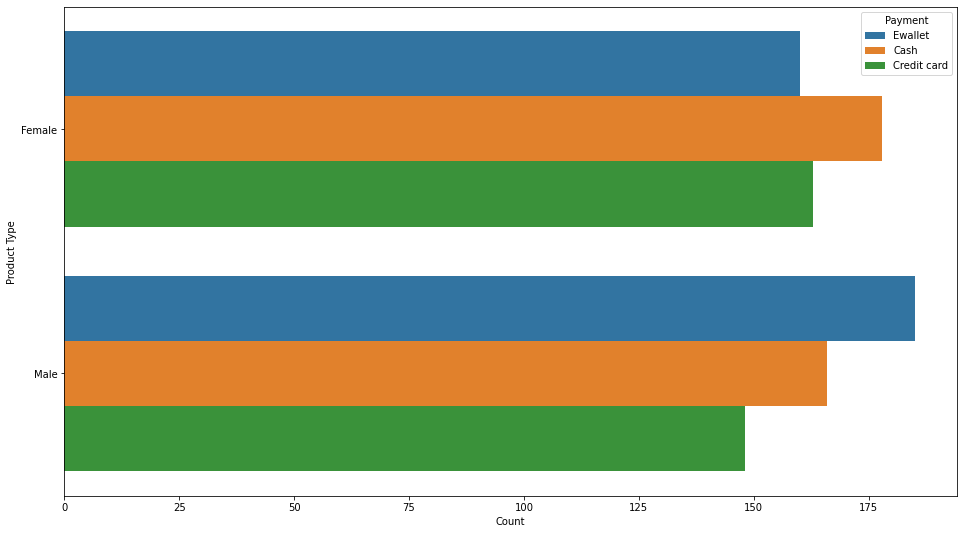

In [34]:
plt.figure(figsize = (16,9))
sns.countplot(y ='Gender', hue = "Payment", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Women are comfortable in carrying cash. Men are not I guess!

# Branches vs Payment methods? Who gets more by card? who's getting more cash?

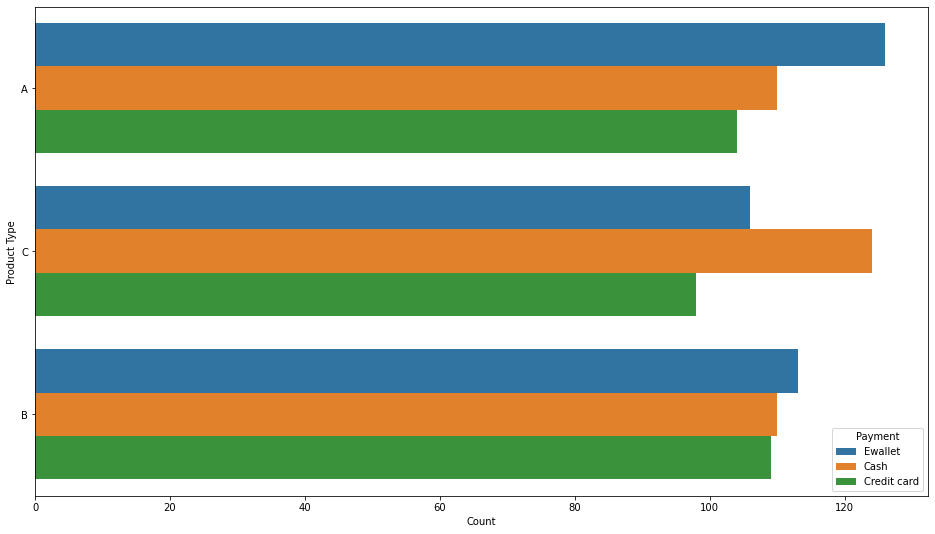

In [35]:
plt.figure(figsize = (16,9))
sns.countplot(y ='Branch', hue = "Payment", data = data) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Apart from branch C, the rest have more non-cash payments. As for C, people are more comfortable in paying cash there

Give Feedbacks if you have any!